# Radon Transform Demo - Sparse and Limited Angle CT Reconstruction
> Author: [Ali Almuallem](https://www.linkedin.com/in/almuallem).
> 5 January 2022

> Note: this is a personal effort tutorial that is prone to errors and mistakes. As I learn more and have time, I will update this notebook with more cool materials and corrections of any potential mistakes.

In [1]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from skimage.transform import radon, iradon, rescale, resize
import math
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
#Return an image object given a link
def get_image(link):
    img = Image.open(link) #Reading the image
    img = ImageOps.grayscale(img) #Converting to grayscale
    smallestDimension = (lambda x: x[0] if (x[0] < x[1]) else x[1])(img.size) #Returns the bigegst dimension
    scale = smallestDimension / 512.0
    img = np.array(img.getdata()).reshape(img.size[0], img.size[1])
    width = math.floor(img.shape[0] /scale)
    height = math.floor(img.shape[1] / scale)
    img =  resize(img, (width, height), 
                  anti_aliasing=True)
    return img

### Put your input image here 👇

In [3]:
target = get_image("Brain CT.jpeg") #Replace test.png with your image path.

Here is what a full blown sinogram look like. This sinogram is computed using projections from 0° to 180° degrees. The number of projections in this case is equal to the largest dimension.

>Example: if the image is 512 x 256, the number of projections will be 512 projections ranging from 0° to 180° degrees.

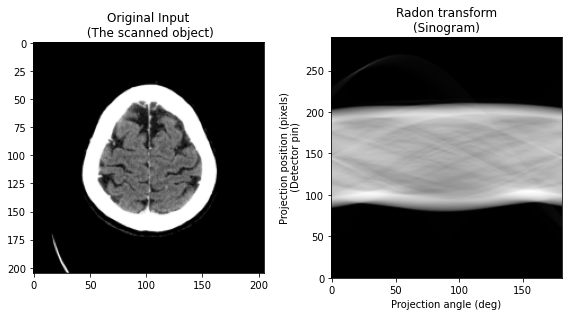

In [4]:
image = target

image = rescale(image, scale=0.4, mode='reflect')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5))

ax1.set_title("Original Input\n (The scanned object)")
ax1.imshow(image, cmap=plt.cm.Greys_r)

theta = np.linspace(0., 180., max(image.shape), endpoint=False)
sinogram = radon(image, theta=theta, circle = False)
dx, dy = 0.5 * 180.0 / max(image.shape), 0.5 / sinogram.shape[0]
ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)\n (Detector pin)")
ax2.imshow(sinogram, cmap=plt.cm.Greys_r,
           extent=(-dx, 180.0 + dx, -dy, sinogram.shape[0] + dy),
           aspect='auto')

fig.tight_layout()
plt.show()

Notice how the sinogram shape is:
>sinogram shape = longest dimension of the image x the number of projections

The 180° comes from our selection of projections angles (from 0° to 180°).


**Now, let's see how the singoram changes if we change the number of projections to something like 30**

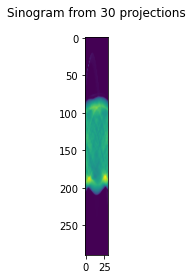

In [5]:
theta_30 = np.linspace(0., 180., 30, endpoint=False)
sinogram_30 = radon(image, theta=theta_30, circle = False)
plt.imshow(sinogram_30)
plt.title("Sinogram from 30 projections\n")
plt.show()

Notice how the shape of the sinogram now is:
> sinogram shape = longest dimension of the image x 30 projections

### Reconstructing from the sinogram above! 🌌

Let's consider both sinogram and reconstruct the original image using the Inverse Radon Transform!

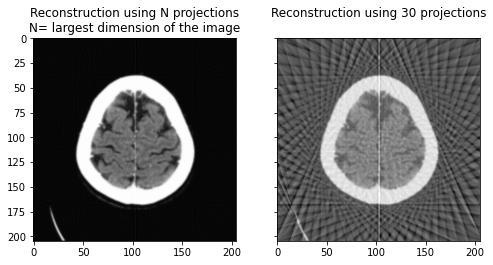

In [6]:
reconstruction_fbp = iradon(sinogram, theta=theta, filter_name='ramp', circle = False)
reconstruction_fbp_30 = iradon(sinogram_30, theta=theta_30, filter_name='ramp', circle = False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction using N projections\nN= largest dimension of the image")
ax1.imshow(reconstruction_fbp, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction using 30 projections\n")
ax2.imshow(reconstruction_fbp_30, cmap=plt.cm.Greys_r )
plt.show()

>You can clearly see the "rays" intercepting through the image.


### Reconstructing from limited angle! 📐

Let's see what effect we would get if we got the same number of projections, but we could only obtain those projections from angle 0° to 45°. A problem known as the **Limited Angle** CT

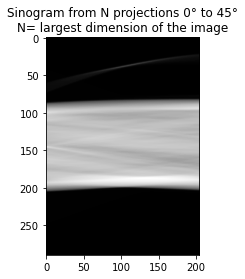

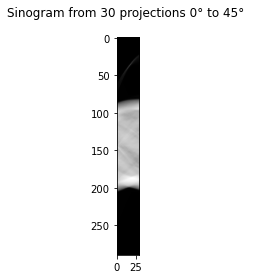

In [7]:
theta_largestProj_45deg = np.linspace(0., 45., max(image.shape), endpoint=False)
sinogram_largest_45 = radon(image, theta=theta_largestProj_45deg, circle = False)

theta_30proj_45deg = np.linspace(0., 45., 30, endpoint=False)
sinogram_30proj_45 = radon(image, theta=theta_30proj_45deg, circle = False)


plt.imshow(sinogram_largest_45, cmap=plt.cm.Greys_r)
plt.title("Sinogram from N projections 0° to 45°\nN= largest dimension of the image")
plt.show()

plt.imshow(sinogram_30proj_45, cmap=plt.cm.Greys_r)
plt.title("Sinogram from 30 projections 0° to 45° \n")

plt.show()

We can see that the sinogram shape now changed.
> sinogram shape = longest dimension of the image x the number of projections

Let's see how the inverse radon (the reconstrction) will look like with this **Limited Angle** scenario

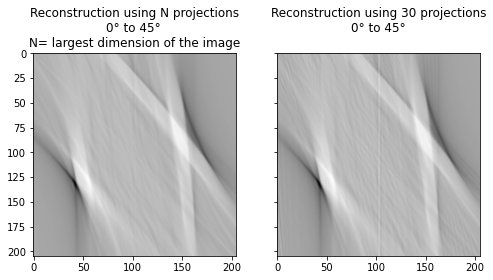

In [8]:
reconstruction_fbp_large_45 = iradon(sinogram, theta=theta_largestProj_45deg, filter_name='ramp', circle = False)
reconstruction_fbp_30_45 = iradon(sinogram_30, theta=theta_30proj_45deg, filter_name='ramp', circle = False)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4.5),
                               sharex=True, sharey=True)
ax1.set_title("Reconstruction using N projections\n0° to 45° \nN= largest dimension of the image")
ax1.imshow(reconstruction_fbp_large_45, cmap=plt.cm.Greys_r)
ax2.set_title("Reconstruction using 30 projections\n0° to 45°\n")
ax2.imshow(reconstruction_fbp_30_45, cmap=plt.cm.Greys_r )
plt.show()

> As we can see, the limited angle scnario yeilds qualitatively unrecognizable reconstructions. There are methods to address such scenarios, and new enhanced methods are being proposed in the literature evey now and then.

### Reconstructing from Sparse Viewes (sparse projections)

Let's consider much fewer number of projections (maybe only 20 projections!) but spread between 0° to 180°. A scenario called **Sparse** CT. 

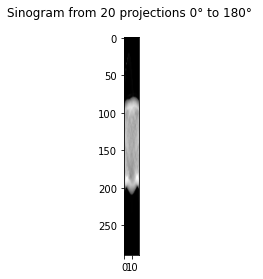

In [9]:
theta_sparse = np.linspace(0., 180., 20, endpoint=False)
sinogram_sparse = radon(image, theta=theta_sparse, circle = False)


plt.imshow(sinogram_sparse, cmap=plt.cm.Greys_r)
plt.title("Sinogram from 20 projections 0° to 180° \n")

plt.show()

We can see that the sinogram shape now changed to:

sinogram shape = longest dimension of the image x the number of projections (10)

### Reconstructing from Sparse sinogram

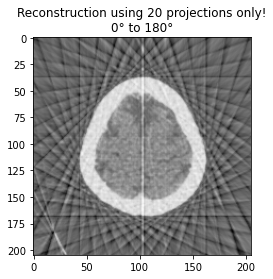

In [10]:
reconstruction_fbp_sparse = iradon(sinogram_sparse, theta=theta_sparse, filter_name='ramp', circle = False)

plt.imshow(reconstruction_fbp_sparse, cmap=plt.cm.Greys_r)
plt.title("Reconstruction using 20 projections only!\n0° to 180°")
plt.show()

As you can see, the sparse views scenario is qualitatively much more recognizable than the limited angle scenario, which deems the limited angle scenario often to be more challenging.

*The CT image source: https://radiopaedia.org/play/26510/entry/473200/case/23768/studies/23911?lang=us*